In [2]:
import simweights
import pickle
import os, sys
import numpy as np
import matplotlib as mat
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.colors as colors
import matplotlib.gridspec as gridspec
import pandas as pd
import tables
import h5py
import math
from scipy.stats import mstats
import matplotlib as mpl
import matplotlib.font_manager as font_manager


In [3]:
font_axis_label = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 22,
        }
font_title = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 24,
        }
font_legend = font_manager.FontProperties(family='serif',
                                   weight='normal',
                                   style='normal', size=17)

In [4]:
def error_cal(bin_edges,weights,data):
    errors = []
    bin_centers = []
    
    for bin_index in range(len(bin_edges) - 1):

        # find which data points are inside this bin
        bin_left = bin_edges[bin_index]
        bin_right = bin_edges[bin_index + 1]
        in_bin = np.logical_and(bin_left < data, data <= bin_right)
        

        # filter the weights to only those inside the bin
        weights_in_bin = weights[in_bin]

        # compute the error however you want
        error = np.sqrt(np.sum(weights_in_bin ** 2))
        errors.append(error)

        # save the center of the bins to plot the errorbar in the right place
        bin_center = (bin_right + bin_left) / 2
        bin_centers.append(bin_center)

    errors=np.asarray(errors)
    bin_centers=np.asarray(bin_centers)
    return errors, bin_centers


def onedimension_hist(ax,x,weights,xlog,ylog,bins_start,bins_stop,bins,error,color,**kwargs):
    
    
    if xlog:
        bins=np.logspace(bins_start,bins_stop,bins)
        
    else:
         bins=np.linspace(bins_start,bins_stop,bins)
        
    counts, edges = np.histogram(x,weights=weights,bins=bins)
    ax.plot(edges,np.append(counts,counts[-1]),
                 drawstyle="steps-post",color=color,
                 **kwargs)
    print('Total counts are',np.sum(counts))
    if error:
        
        error,bin_centres = error_cal(edges,weights,x)
        
        ax.errorbar(x=bin_centres, y=counts,
                 yerr=error, color=color,fmt='o', markersize=8,capsize=5)
    if xlog:
        plt.semilogx()
    if ylog:
        plt.semilogy()


In [5]:
NuE2_file = pd.HDFStore('/data/ana/Diffuse/GlobalFit_Flavor/taupede/SnowStorm/RecowithBfr/Baseline/hdf_files/PostMask/22082_60TeVCut.hdf5','r')
NuMu2_file = pd.HDFStore('/data/ana/Diffuse/GlobalFit_Flavor/taupede/SnowStorm/RecowithBfr/Baseline/hdf_files/PostMask/22079_60TeVCut.hdf5','r')
NuTau2_file = pd.HDFStore('/data/ana/Diffuse/GlobalFit_Flavor/taupede/SnowStorm/RecowithBfr/Baseline/hdf_files/PostMask/22085_60TeVCut.hdf5','r')

NuE3_file = pd.HDFStore('/data/ana/Diffuse/GlobalFit_Flavor/taupede/SnowStorm/RecowithBfr/Baseline/hdf_files/PostMask/22083_60TeVCut.hdf5','r')
NuMu3_file = pd.HDFStore('/data/ana/Diffuse/GlobalFit_Flavor/taupede/SnowStorm/RecowithBfr/Baseline/hdf_files/PostMask/22080_60TeVCut.hdf5','r')
NuTau3_file = pd.HDFStore('/data/ana/Diffuse/GlobalFit_Flavor/taupede/SnowStorm/RecowithBfr/Baseline/hdf_files/PostMask/22086_60TeVCut.hdf5','r')

In [6]:
NuE_file = pd.HDFStore('/data/ana/Diffuse/GlobalFit_Flavor/taupede/SnowStorm/RecowithBfr/Baseline/hdf_files/PostMask/NuE_HS_merged.hdf5','r')
NuMu_file = pd.HDFStore('/data/ana/Diffuse/GlobalFit_Flavor/taupede/SnowStorm/RecowithBfr/Baseline/hdf_files/PostMask/NuMu_HS_merged.hdf5','r')
NuTau_file = pd.HDFStore('/data/ana/Diffuse/GlobalFit_Flavor/taupede/SnowStorm/RecowithBfr/Baseline/hdf_files/PostMask/NuTau_HS_merged.hdf5','r')

In [7]:
                                  ######### NuE Variables #########

PrimaryNeutrinoEnergy_NuE = NuE_file['I3MCWeightDict']['PrimaryNeutrinoEnergy'].values
PrimartNeutrinoType_NuE = NuE_file['I3MCWeightDict']['PrimaryNeutrinoType'].values
PrimaryNeutrinoAzimuth_NuE = NuE_file['I3MCWeightDict']['PrimaryNeutrinoAzimuth'].values
PrimaryNeutrinoZenith_NuE = NuE_file['I3MCWeightDict']['PrimaryNeutrinoZenith'].values
MCInteractionType_NuE = NuE_file['I3MCWeightDict']['InteractionType'].values
#MCInteractionDepth_NuE = NuE_file['penetrating_depth'].value.values

TrueAzimuth_NuE = NuE_file['TrueAzimuth'].value.values
TrueETot_NuE = NuE_file['TrueETot'].value.values
TrueL_NuE = NuE_file['TrueL'].value.values
TrueZenith_NuE = NuE_file['TrueZenith'].value.values
TrueInteractionEventclass_NuE = NuE_file['MCInteractionEventclass'].value.values

RecoAzimuth_NuE = NuE_file['RecoAzimuth'].value.values
RecoEConfinement_NuE = NuE_file['RecoEConfinement'].value.values
RecoERatio_NuE = NuE_file['RecoERatio'].value.values
RecoZenith_NuE = NuE_file['RecoZenith'].value.values
RecoL_NuE = NuE_file['RecoL'].value.values
RecoETot_NuE = NuE_file['RecoETot'].value.values
FinalEventClass_NuE = NuE_file['FinalTopology'].value.values
RecoLbyE_NuE = NuE_file['RecoLbyE'].value.values
ConventionalSelfVetoWeight_NuE = NuE_file['ConventionalAtmosphericPassingFractions'].value.values
PromptSelfVetoWeight_NuE = NuE_file['PromptAtmosphericPassingFractions'].value.values



In [8]:
                                  ######### NuMu Variables #########

PrimaryNeutrinoEnergy_NuMu = NuMu_file['I3MCWeightDict']['PrimaryNeutrinoEnergy'].values
PrimartNeutrinoType_NuMu = NuMu_file['I3MCWeightDict']['PrimaryNeutrinoType'].values
PrimaryNeutrinoAzimuth_NuMu = NuMu_file['I3MCWeightDict']['PrimaryNeutrinoAzimuth'].values
PrimaryNeutrinoZenith_NuMu = NuMu_file['I3MCWeightDict']['PrimaryNeutrinoZenith'].values
MCInteractionType_NuMu = NuMu_file['I3MCWeightDict']['InteractionType'].values
#MCInteractionDepth_NuMu = NuMu_file['penetrating_depth'].value.values

TrueAzimuth_NuMu = NuMu_file['TrueAzimuth'].value.values
TrueETot_NuMu = NuMu_file['TrueETot'].value.values
TrueL_NuMu = NuMu_file['TrueL'].value.values
TrueZenith_NuMu = NuMu_file['TrueZenith'].value.values
TrueInteractionEventclass_NuMu = NuMu_file['MCInteractionEventclass'].value.values

RecoAzimuth_NuMu = NuMu_file['RecoAzimuth'].value.values
RecoEConfinement_NuMu = NuMu_file['RecoEConfinement'].value.values
RecoERatio_NuMu = NuMu_file['RecoERatio'].value.values
RecoZenith_NuMu = NuMu_file['RecoZenith'].value.values
RecoL_NuMu = NuMu_file['RecoL'].value.values
RecoETot_NuMu = NuMu_file['RecoETot'].value.values
FinalEventClass_NuMu = NuMu_file['FinalTopology'].value.values
RecoLbyE_NuMu = NuMu_file['RecoLbyE'].value.values
ConventionalSelfVetoWeight_NuMu = NuMu_file['ConventionalAtmosphericPassingFractions'].value.values
PromptSelfVetoWeight_NuMu = NuMu_file['PromptAtmosphericPassingFractions'].value.values


In [9]:
                                  ######### NuTau Variables #########

PrimaryNeutrinoEnergy_NuTau = NuTau_file['I3MCWeightDict']['PrimaryNeutrinoEnergy'].values
PrimartNeutrinoType_NuTau = NuTau_file['I3MCWeightDict']['PrimaryNeutrinoType'].values
PrimaryNeutrinoAzimuth_NuTau = NuTau_file['I3MCWeightDict']['PrimaryNeutrinoAzimuth'].values
PrimaryNeutrinoZenith_NuTau = NuTau_file['I3MCWeightDict']['PrimaryNeutrinoZenith'].values
MCInteractionType_NuTau = NuTau_file['I3MCWeightDict']['InteractionType'].values
#MCInteractionDepth_NuTau = NuTau_file['penetrating_depth'].value.values

TrueAzimuth_NuTau = NuTau_file['TrueAzimuth'].value.values
TrueETot_NuTau = NuTau_file['TrueETot'].value.values
TrueL_NuTau = NuTau_file['TrueL'].value.values
TrueZenith_NuTau = NuTau_file['TrueZenith'].value.values
TrueInteractionEventclass_NuTau = NuTau_file['MCInteractionEventclass'].value.values

RecoAzimuth_NuTau = NuTau_file['RecoAzimuth'].value.values
RecoEConfinement_NuTau = NuTau_file['RecoEConfinement'].value.values
RecoERatio_NuTau = NuTau_file['RecoERatio'].value.values
RecoZenith_NuTau = NuTau_file['RecoZenith'].value.values
RecoL_NuTau = NuTau_file['RecoL'].value.values
RecoETot_NuTau = NuTau_file['RecoETot'].value.values
FinalEventClass_NuTau = NuTau_file['FinalTopology'].value.values
RecoLbyE_NuTau = NuTau_file['RecoLbyE'].value.values
ConventionalSelfVetoWeight_NuTau= NuTau_file['ConventionalAtmosphericPassingFractions'].value.values
PromptSelfVetoWeight_NuTau = NuTau_file['PromptAtmosphericPassingFractions'].value.values




In [10]:
def plot_2dHist(x,y,weights,xbins_start,xbins_stop,xbins,ybins_start,ybins_stop,ybins,\
                xlogspace,ylogspace,title,xlabel,ylabel,eventcount,length,ETLine,text,Text,vmin,vmax):
    import matplotlib as mat
    import matplotlib.font_manager as font_manager
    font_axis_label = {'family': 'serif',
            'color':  'black',
            'weight': 'normal',
            'size': 22,
            }
    font_title = {'family': 'serif',
            'color':  'black',
            'weight': 'bold',
            'size': 20,
            }
    font_legend = font_manager.FontProperties(family='serif',
                                       weight='normal',
                                       style='normal', size=10)
    fig= plt.figure(figsize=(14,8))
    ax = plt.subplot(111)
    cmap = plt.colormaps['plasma']
    if xlogspace:
        x_bins=np.logspace(xbins_start,xbins_stop,xbins)
        
    else:
        x_bins=np.linspace(xbins_start,xbins_stop,xbins)
        
    
    if ylogspace:
        
        y_bins =np.logspace(ybins_start,ybins_stop,ybins)
    else:
        
        y_bins =np.linspace(ybins_start,ybins_stop,ybins)
    bins = [x_bins,y_bins]
    
    H, xedges, yedges = np.histogram2d(x,y,bins = [x_bins,y_bins],\
                                   weights=weights)
    H /= np.sum(H)
    
    if ETLine:
        # E vs L line
        L = [0.05,0.5,5,50,500,5000]
        Length = np.array(L)
        E = [1e3,1e4,1e5,1e6,1e7,1e8]
        Energy = np.array(E)
        ax.plot(Length,Energy,'w:',label= r'$E_\tau = \frac{1PeV}{50m} L$')
        plt.legend(fontsize=14,loc='upper right')
    #norm=colors.LogNorm()
    #h = ax.pcolormesh(xedges, yedges, H.T,norm = mat.colors.LogNorm())
    h = ax.pcolormesh(xedges, yedges, H.T,cmap=cmap,norm = mat.colors.Normalize(vmin=vmin, vmax=vmax))
    #h = ax.pcolormesh(xedges, yedges, H.T,norm = mat.colors.Normalize())
    plt.xlim(min(x_bins),max(x_bins))
    plt.ylim(min(y_bins),max(y_bins))
    plt.title(title,fontdict=font_title)
    plt.xlabel(xlabel,fontdict=font_axis_label)
    plt.ylabel(ylabel,fontdict=font_axis_label)
    
    if xlogspace:
        ax.set_xscale('log')
        if length:
            ax.set_xticks([10,20,50,80,100,200,500,1000])
            ax.get_xaxis().set_major_formatter(mat.ticker.ScalarFormatter())
        
    if ylogspace:
        ax.set_yscale('log')
        
        
        
    if eventcount:
        EventCount, _, __ = np.histogram2d(x,y,bins = [x_bins,y_bins])
        print("Total Hist Count is %d"%np.sum(EventCount))
        if xlogspace:
                midbins_x = np.sqrt(x_bins[:-1] * x_bins[1:])
                
        else:
                midbins_x = (x_bins[1:] - x_bins[:-1])/2 + x_bins[:-1]   
                
                
        if ylogspace:
                
                midbins_y = np.sqrt(y_bins[:-1] * y_bins[1:])
        else:
                
                midbins_y = (y_bins[1:] - y_bins[:-1])/2 + y_bins[:-1]   
                
        for i_x in range(len(xedges)-1):
            for i_y  in range(len(yedges)-1):
                ax.text(midbins_x[i_x],
                        midbins_y[i_y],
                        int(EventCount[i_x, i_y]),
                        color='w',
                        ha='center',
                        va='center',
                        fontweight='normal',
                        fontsize = 12,
                       )
   
    for item in (ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(18)
        item.set_family('serif')
    if text:
        
        ax.text(0.05, 0.95,Text,color='white',family='serif', transform=ax.transAxes, fontsize=30,fontweight='bold',
            verticalalignment='top', bbox=dict(facecolor='none', edgecolor='white'))
    clb = plt.colorbar(h)
    clb.set_label('Probability Density',rotation=270,labelpad=20,fontdict=font_axis_label)
    clb.ax.tick_params(labelsize=18)
    plt.show()

In [11]:
import pickle
class SplineHandler(object):
    """
    Class implementing the flux weight calculation from a
    spline file created before
    (adjusted for MCEq)
    """
    IS_SYS_PARAM = False
    def __init__(self, spline_file, flux_keys, barr_key=None):
        self.spline_file = spline_file
        self.flux_keys = flux_keys
        self.barr_key = barr_key
        self.Ecut = 5e8 ## force highE weights to zero
        if self.barr_key is not None:
            self.spline_dict = self._load_pickle(spline_file)[1][self.barr_key]
            self.mag = 0
            self.spline_in_log = False
        else:
            self.spline_dict = self._load_pickle(spline_file)
            self.mag = self.spline_dict[0]["Emultiplier"]
            self.spline_in_log = True
        self._pid_dict = {"conv_numu" : 14,
                          "conv_antinumu" : -14,
                          "conv_nue" : 12,
                          "conv_antinue" : -12,
                          "conv_nutau" : 16,
                          "conv_antinutau" : -16,
                          "k_numu" : 14,
                          "k_antinumu" : -14,
                          "k_nue" : 12,
                          "k_antinue" : -12,
                          "pi_numu" : 14,
                          "pi_antinumu" : -14,
                          "pi_nue" : 12,
                          "pi_antinue" : -12,
                          "numu" : 14,
                          "antinumu" : -14,
                          "nue" : 12,
                          "antinue" : -12,
                          "conv_numuMSIS00_ICSouthPoleJanuary": 14,
                          "conv_antinumuMSIS00_ICSouthPoleJanuary": -14,
                          "conv_numuMSIS00_ICSouthPoleJuly": 14,
                          "conv_antinumuMSIS00_ICSouthPoleJuly": -14,
                          "pr_antinumu" : -14,
                          "pr_numu" : 14,
                          "pr_nue" : 12,
                          "pr_antinue" : -12,
                          "pr_antinutau" : -16,
                          "pr_nutau": 16}
    
    def resolve_pid(self, flux_key):
        
        return self._pid_dict[flux_key]
    
    def _load_pickle(self, pickle_file):
        """
        Returns the content of a pickle file.
        Compatible with python2 AND python3 pickle files.
        """
        try:
            with open(pickle_file, 'rb') as f:
                pickle_data = pickle.load(f)
        except UnicodeDecodeError as e:
            with open(pickle_file, 'rb') as f:
                pickle_data = pickle.load(f, encoding='latin1')
        except Exception as e:
            print('Unable to load data ', pickle_file, ':', e)
            raise
        return pickle_data
    
    def return_weight(self, pid_ints, energys, cosZs):
        """
        Return weight from spline. Correct for the E**mag factor that was
        applied during creationp.
        Args: _particleID, coszenith, energy
        """
        theta_deg = 180./np.pi*np.arccos(cosZs)
        logenergy = np.log10(energys)
        weights = np.zeros_like(cosZs)
        #logger.debug("Calculating MCEq weights from spline %s",
        #             self.spline_file)
        
        for flux_key in self.flux_keys:
            pid_idcs = np.argwhere(pid_ints == self.resolve_pid(flux_key))
            if self.barr_key is None:
                weights[pid_idcs] = 10**self.spline_dict[1][flux_key](theta_deg[pid_idcs],
                                                                      logenergy[pid_idcs],
                                                                      grid=False)
            else:
                #special treatment for barr-splines (were built slightly diff.)
                weights[pid_idcs] = self.spline_dict[flux_key](
                    theta_deg[pid_idcs],
                    logenergy[pid_idcs],
                    grid=False)
            ##hard fix to remove the highE madness of MCEq gradients
            #logger.warning("Forcing {} atmospheric weights for super highE weights to zero for numerical stability.".format(flux_key))
            weights[np.argwhere(logenergy>np.log10(self.Ecut))] = 0.
            ## check for NaN
            ##logger.warning("Found {} events with NaN weights.".format(len(weights[np.argwhere(np.isnan(weights))])))
            #weights[np.argwhere(np.isnan(weights))] = 0.
            ##correct for the E**mag factor from MCEq
            weights[pid_idcs] /= energys[pid_idcs]**self.mag
        return weights


In [12]:
def Get_Weights(file,nfiles,conventional,prompt,Astro):
    
    
    if conventional:
            
            flux_keys_conv =  ['conv_antinumu','conv_numu','conv_antinue','conv_nue','conv_antinutau','conv_nutau']
            spline_file = '/data/ana/Diffuse/NNMFit/MCEq_splines/v1.2.1/MCEq_splines_PRI-Gaisser-H4a_INT-SIBYLL23c_allfluxes.pickle'
            spline_object_conv = SplineHandler(spline_file, flux_keys_conv)
            conv_flux = spline_object_conv.return_weight
            
            generator_conv = lambda pdgid, energy, cos_zen: conv_flux(pdgid, energy, cos_zen)
            
            weighter = simweights.NuGenWeighter(file,nfiles=nfiles)
            weights = weighter.get_weights(generator_conv)
            
        
    if prompt:
            
            flux_keys_pr =  ['pr_antinumu','pr_numu','pr_antinue','pr_nue','pr_antinutau','pr_nutau']
            spline_file = '/data/ana/Diffuse/NNMFit/MCEq_splines/v1.2.1/MCEq_splines_PRI-Gaisser-H4a_INT-SIBYLL23c_allfluxes.pickle'
            spline_object_pr = SplineHandler(spline_file, flux_keys_pr)
            pr_flux = spline_object_pr.return_weight
            
            generator_pr = lambda pdgid, energy, cos_zen: pr_flux(pdgid, energy, cos_zen)
            
            weighter = simweights.NuGenWeighter(file,nfiles=nfiles)
            weights = weighter.get_weights(generator_pr)
            

    if Astro:
        def AstroFluxModel(pdgid, energy, cos_zen):
            flux = 0.5*(2.12*1e-18)*(energy/1e5)**-2.87 #HESE 7.5 Bestfit
            #flux = 0.5*(1.44*1e-18)*(energy/1e5)**-2.37 #Northern Tracks 9.5 Bestfit
            return flux

        weighter = simweights.NuGenWeighter(file,nfiles=nfiles)
        weights = weighter.get_weights(AstroFluxModel)
    
    

    return weights



In [13]:
def combineweights (f2,f3,nfile2,nfile3,conventional,prompt,Astro):
    #w1 = Get_Weights(f1,nfiles=nfile1,conventional=conventional,prompt=prompt,Astro=Astro)
    w2 = Get_Weights(f2,nfiles=nfile2,conventional=conventional,prompt=prompt,Astro=Astro)
    w3 = Get_Weights(f3,nfiles=nfile3,conventional=conventional,prompt=prompt,Astro=Astro)
    w = np.concatenate((w2,w3))
    return w

In [14]:
# neha

NuE_Astro = combineweights(f2=NuE2_file,f3=NuE3_file,nfile2=1225,nfile3=6987,\
                           conventional=False,prompt=False,Astro=True)
NuMu_Astro = combineweights(f2=NuMu2_file,f3=NuMu3_file,nfile2=1579,nfile3=5245,\
                           conventional=False,prompt=False,Astro=True)
NuTau_Astro = combineweights(f2=NuTau2_file,f3=NuTau3_file,nfile2=1155,nfile3=6466,\
                           conventional=False,prompt=False,Astro=True)


NuE_conventional = combineweights(f2=NuE2_file,f3=NuE3_file,nfile2=1225,nfile3=6987,\
                           conventional=True,prompt=False,Astro=False)
NuMu_conventional = combineweights(f2=NuMu2_file,f3=NuMu3_file,nfile2=1579,nfile3=5245,\
                           conventional=True,prompt=False,Astro=False)
NuTau_conventional = combineweights(f2=NuTau2_file,f3=NuTau3_file,nfile2=1155,nfile3=6466,\
                           conventional=True,prompt=False,Astro=False)

NuE_prompt = combineweights(f2=NuE2_file,f3=NuE3_file,nfile2=1225,nfile3=6987,\
                           conventional=False,prompt=True,Astro=False)
NuMu_prompt = combineweights(f2=NuMu2_file,f3=NuMu3_file,nfile2=1579,nfile3=5245,\
                           conventional=False,prompt=True,Astro=False)
NuTau_prompt = combineweights(f2=NuTau2_file,f3=NuTau3_file,nfile2=1155,nfile3=6466,\
                           conventional=False,prompt=True,Astro=False)

/tmp/ipykernel_43379/79106431.py:62: DeprecationWarning: Please import `RectBivariateSpline` from the `scipy.interpolate` namespace; the `scipy.interpolate.fitpack2` namespace is deprecated and will be removed in SciPy 2.0.0.
  pickle_data = pickle.load(f)


In [15]:
# thijs

# Append the custom module path
sys.path.append("/data/user/tvaneede/GlobalFit/reco_processing")

# Import the datasets module
from datasets import datasets

# set the inputs
reco_version = "spice_tau_reco"

# Dynamically select the desired dataset
simulation_dataset = getattr(datasets, reco_version)

# weight functions
spline_file = '/data/ana/Diffuse/NNMFit/MCEq_splines/v1.2.1/MCEq_splines_PRI-Gaisser-H4a_INT-SIBYLL23c_allfluxes.pickle'

livetime_s = 1

# conventional            
flux_keys_conv =  ['conv_antinumu','conv_numu','conv_antinue','conv_nue','conv_antinutau','conv_nutau']
spline_object_conv = SplineHandler(spline_file, flux_keys_conv)
conv_flux = spline_object_conv.return_weight
generator_conv = lambda pdgid, energy, cos_zen: conv_flux(pdgid, energy, cos_zen)

# prompt
flux_keys_pr =  ['pr_antinumu','pr_numu','pr_antinue','pr_nue','pr_antinutau','pr_nutau']
spline_object_pr = SplineHandler(spline_file, flux_keys_pr)
pr_flux = spline_object_pr.return_weight
generator_pr = lambda pdgid, energy, cos_zen: pr_flux(pdgid, energy, cos_zen)

# astro
gamma_astro = 2.87
per_flavor_norm = 2.12
def AstroFluxModel(pdgid, energy, cos_zen):
    flux = 0.5*(per_flavor_norm*1e-18)*(energy/1e5)**-gamma_astro
    return flux

def open_datasets( simulation_dataset, keys_to_merge ):

    # open the files
    for key in simulation_dataset:
        print(f"----- Extracting files for {key}")
        simulation_dataset[key]['hdf_file'] = pd.HDFStore(simulation_dataset[key]['hdf_file_path'],'r')
        simulation_dataset[key]['weighter'] = simweights.NuGenWeighter( simulation_dataset[key]['hdf_file'] ,nfiles=simulation_dataset[key]['nfiles'])

    # merging files
    for new_key in keys_to_merge:
        print(f"----- Creating new key {new_key}")
        simulation_dataset[new_key] = {}
        simulation_dataset[new_key]['variables'] = {}
        simulation_dataset[new_key]['weighter'] = None

        for key in keys_to_merge[new_key]:
            
            print(f"Using {key}")
            # merge the weighters
            if simulation_dataset[new_key]['weighter'] == None:
                simulation_dataset[new_key]['weighter'] = simulation_dataset[key]['weighter']
            else: simulation_dataset[new_key]['weighter'] += simulation_dataset[key]['weighter']

    # calculate weights
    for key in simulation_dataset:
        simulation_dataset[key]['weights_astro'] = simulation_dataset[key]["weighter"].get_weights(AstroFluxModel) * livetime_s
        simulation_dataset[key]['weights_conv'] = simulation_dataset[key]["weighter"].get_weights(generator_conv) * livetime_s
        simulation_dataset[key]['weights_pr'] = simulation_dataset[key]["weighter"].get_weights(generator_pr) * livetime_s


    return simulation_dataset


keys_to_merge = {
    "NuE" : ["NuE_midE2", "NuE_highE2"],
    "NuMu" : ["NuMu_midE2", "NuMu_highE2"],
    "NuTau" : ["NuTau_midE2", "NuTau_highE2"],
    "NuAll" : ['NuE', "NuMu", "NuTau"],

}

imulation_dataset = open_datasets( simulation_dataset, keys_to_merge )

/tmp/ipykernel_43379/79106431.py:62: DeprecationWarning: Please import `RectBivariateSpline` from the `scipy.interpolate` namespace; the `scipy.interpolate.fitpack2` namespace is deprecated and will be removed in SciPy 2.0.0.
  pickle_data = pickle.load(f)


----- Extracting files for NuTau_midE2
----- Extracting files for NuTau_highE2
----- Extracting files for NuE_midE2
----- Extracting files for NuE_highE2
----- Extracting files for NuMu_midE2
----- Extracting files for NuMu_highE2
----- Creating new key NuE
Using NuE_midE2
Using NuE_highE2
----- Creating new key NuMu
Using NuMu_midE2
Using NuMu_highE2
----- Creating new key NuTau
Using NuTau_midE2
Using NuTau_highE2
----- Creating new key NuAll
Using NuE
Using NuMu
Using NuTau


Lets compare some weights.
- Do the number of files match? Neha only uses the second batch of files, and there is one file less in NuTau_highE2 for me. I have 6465, while she has 6466. Lets only compare NuE for now. I commented out half the files from spice tau reco

In [ ]:
# compare length of the weights
NuE_Astro_thijs = simulation_dataset["NuE"]['weights_astro']
RecoETot = simulation_dataset["NuE"]["weighter"].get_column("RecoETot", "value")
mask = RecoETot > 60e3
NuE_Astro_thijs = NuE_Astro_thijs[mask]

print( len(NuE_Astro), len(NuE_Astro_thijs) )
print( sum(NuE_Astro), sum(NuE_Astro_thijs) )




42942 43061
1.1345378745321825e-07 1.1444596399030132e-07


In [25]:
# compare entries in one file
RecoETot = simulation_dataset["NuE_midE2"]["weighter"].get_column("RecoETot", "value")
mask = RecoETot > 60e3

events_neha = Get_Weights(file=NuE2_file, nfiles=1225, conventional= False,prompt= False,Astro=True)

print( len(events_neha), len(RecoETot[mask]) )


22782 22865


In [52]:
# i have extra events, where are they coming from?
file_neha = NuE2_file
file_thijs = simulation_dataset["NuE_midE2"]["hdf_file"]
print(file_neha)
print(file_thijs)

events_neha = file_neha["I3EventHeader"]

# Apply mask to Thijs events first
mask = file_thijs["RecoETot"].value > 60e3
events_thijs = file_thijs["I3EventHeader"][mask]

print(len(events_neha), len(events_thijs))

# Turn Neha's events into a set of tuples
set_neha = set(zip(
    file_neha["I3EventHeader"]["Run"],
    file_neha["I3EventHeader"]["Event"],
))

# Turn Thijs's masked events into a set of tuples
set_thijs = set(zip(
    events_thijs["Run"],
    events_thijs["Event"],
))

print( len(set_neha), len(set_thijs) )

print("Extra in Thijs:", len(set_thijs - set_neha))
print("Extra in Neha:", len(set_neha - set_thijs))

print(set_thijs - set_neha)
print(set_neha - set_thijs)

<class 'pandas.io.pytables.HDFStore'>
File path: /data/ana/Diffuse/GlobalFit_Flavor/taupede/SnowStorm/RecowithBfr/Baseline/hdf_files/PostMask/22082_60TeVCut.hdf5

<class 'pandas.io.pytables.HDFStore'>
File path: /data/user/tvaneede/GlobalFit/reco_processing/hdf/output/spice_tau_reco/NuE_22082.h5

22782 22865
22782 22865
Extra in Thijs: 178
Extra in Neha: 95
{(2208200327, 2770), (2208200941, 2028), (2208200981, 2229), (2208200540, 1461), (2208200020, 2865), (2208200512, 2116), (2208200206, 587), (2208200343, 1087), (2208200573, 2150), (2208200287, 713), (2208200123, 1675), (2208200672, 722), (2208200437, 1667), (2208200388, 1384), (2208200066, 677), (2208200762, 1408), (2208200497, 726), (2208200177, 727), (2208201092, 2583), (2208200838, 2160), (2208200258, 2851), (2208201076, 2596), (2208201016, 1956), (2208201171, 2513), (2208201057, 923), (2208200482, 2641), (2208200820, 940), (2208200632, 1481), (2208200739, 2218), (2208200924, 2291), (2208200560, 74), (2208200099, 2296), (22082009

Lets check the extra event in my file:
(2208200327, 2770)
and the extra event in neha's file
(2208200535, 123)

dataio-shovel /data/ana/Diffuse/GlobalFit_Flavor/taupede/SnowStorm/RecowithBfr/Baseline/22082/0000000-0000999/Reco_NuE_000327_out.i3.bz2 
HESE_VHESelfVeto [I3PODHolder<bool>]:
false
FinalTopology [I3PODHolder<double>]:
1
HESEEventclass [I3PODHolder<double>]:
1
CausalQTot [I3PODHolder<double>]:
10516.6
VHESelfVeto [I3PODHolder<bool>]:
false
RecoETot [I3PODHolder<double>]:
60431.8
The event should be in Neha's file!

dataio-shovel /data/ana/Diffuse/GlobalFit_Flavor/taupede/SnowStorm/RecowithBfr/Baseline/22082/0000000-0000999/Reco_NuE_000535_out.i3.bz2
HESE_VHESelfVeto [I3PODHolder<bool>]:
false
FinalTopology [I3PODHolder<double>]:
1
HESEEventclass [I3PODHolder<double>]:
1
CausalQTot [I3PODHolder<double>]:
8976.3
VHESelfVeto [I3PODHolder<bool>]:
false
RecoETot [I3PODHolder<double>]:
55883.9
PrimaryNeutrinoEnergy => 58930.2,
This event should not be in Neha's file! But it's there?!

In [61]:
mask =  (file_neha["I3EventHeader"]["Run"] == 2208200535) & (file_neha["I3EventHeader"]["Event"] == 123)
print(file_neha["RecoETot"][mask])
print(file_neha["I3MCWeightDict"]["PrimaryNeutrinoEnergy"][mask])

mask =  (file_thijs["I3EventHeader"]["Run"] == 2208200535) & (file_thijs["I3EventHeader"]["Event"] == 123)
print(file_thijs["RecoETot"][mask])
print(file_thijs["I3MCWeightDict"]["PrimaryNeutrinoEnergy"][mask])

             Run  Event  SubEvent  SubEventStream  exists         value
9708  2208200535    123         0               0       1  60086.328003
9708    58930.204286
Name: PrimaryNeutrinoEnergy, dtype: float64
              Run  Event  SubEvent  SubEventStream  exists         value
11570  2208200535    123         0               0       1  55883.926818
11570    58930.204286
Name: PrimaryNeutrinoEnergy, dtype: float64


There is a different RecoETot in Neha's hdf file, while it is already stored in the reco file that she created. Perhaps I should check a different reco type?

/data/ana/Diffuse/GlobalFit_Flavor/taupede/SnowStorm/RecowithSpice321/Baseline/hdf_files/PostMask/22082_60TeVCut.hdf5

In [66]:
file_path = "/data/ana/Diffuse/GlobalFit_Flavor/taupede/SnowStorm/RecowithSpice321/Baseline/hdf_files/PostMask/22082_60TeVCut.hdf5"

file_neha_2 = pd.HDFStore(file_path,'r')

mask =  (file_neha_2["I3EventHeader"]["Run"] == 2208200535)  & (file_neha_2["I3EventHeader"]["Event"] == 159) # 123
print(file_neha_2["RecoETot"][mask])
print(file_neha_2["I3MCWeightDict"]["PrimaryNeutrinoEnergy"][mask])


             Run  Event  SubEvent  SubEventStream  exists          value
9635  2208200535    159         0               0       1  455630.030204
9635    601489.319182
Name: PrimaryNeutrinoEnergy, dtype: float64


It seems that the event is not in here, as expected

dataio-shovel /data/ana/Diffuse/GlobalFit_Flavor/taupede/SnowStorm/RecowithBfr/Baseline/22082/0000000-0000999/Reco_NuE_000535_out.i3.bz2 

but it doesnt match this.

In [14]:
NuE_Conventional = ConventionalSelfVetoWeight_NuE*NuE_conventional
NuMu_Conventional = ConventionalSelfVetoWeight_NuMu*NuMu_conventional
NuTau_Conventional = ConventionalSelfVetoWeight_NuTau*NuTau_conventional

NuE_Prompt = PromptSelfVetoWeight_NuE*NuE_prompt
NuMu_Prompt = PromptSelfVetoWeight_NuMu*NuMu_prompt
NuTau_Prompt = PromptSelfVetoWeight_NuTau*NuTau_prompt

NuE_Atmospheric = NuE_Conventional+NuE_Prompt
NuMu_Atmospheric = NuMu_Conventional+NuMu_Prompt
NuTau_Atmospheric = NuTau_Conventional+NuTau_Prompt

In [15]:
#Total weights in per second
NuE_TotalWeights = NuE_Astro+NuE_Atmospheric
NuMu_TotalWeights = NuMu_Astro+NuMu_Atmospheric
NuTau_TotalWeights = NuTau_Astro+NuTau_Atmospheric

In [16]:

RecoTopologies = np.concatenate((FinalEventClass_NuE,FinalEventClass_NuMu,FinalEventClass_NuTau))
TrueTopologies = np.concatenate((TrueInteractionEventclass_NuE,TrueInteractionEventclass_NuMu,\
                                 TrueInteractionEventclass_NuTau))
All_Lengths = np.concatenate((RecoL_NuE,RecoL_NuMu,RecoL_NuTau))
All_LbyE = np.concatenate((RecoLbyE_NuE,RecoLbyE_NuMu,RecoLbyE_NuTau))
All_zenith = np.concatenate((RecoZenith_NuE,RecoZenith_NuMu,RecoZenith_NuTau))
All_energy = np.concatenate((RecoETot_NuE,RecoETot_NuMu,RecoETot_NuTau))
All_weights = np.concatenate((NuE_TotalWeights,NuMu_TotalWeights,NuTau_TotalWeights))
All_atm = np.concatenate((NuE_Atmospheric,NuMu_Atmospheric,NuTau_Atmospheric))
All_astro = np.concatenate((NuE_Astro,NuMu_Astro,NuTau_Astro))
All_conv = np.concatenate((NuE_Conventional,NuMu_Conventional,NuTau_Conventional))
Flavors = np.concatenate((PrimartNeutrinoType_NuE,PrimartNeutrinoType_NuMu,PrimartNeutrinoType_NuTau))
RecoEConfinement = np.concatenate((RecoEConfinement_NuE,RecoEConfinement_NuMu,\
                                       RecoEConfinement_NuTau))
RecoERatio = np.concatenate((RecoERatio_NuE,RecoERatio_NuMu,RecoERatio_NuTau))
All_Primary = np.concatenate((PrimartNeutrinoType_NuE,PrimartNeutrinoType_NuMu,PrimartNeutrinoType_NuTau))

In [17]:
d = RecoTopologies==2

true_topo_Double_old = TrueTopologies[d]
EC_Double_old = RecoEConfinement[d]
ER_Double_old = RecoERatio[d]
primary_Double_old = All_Primary[d]
Astro_Double_old = All_astro[d]
Total_Double_old = All_weights[d]
LByE_Double_old = All_LbyE[d]
Length_Double_old = All_Lengths[d]
Energy_Double_old = All_energy[d]
Zenith_Double_old = All_zenith[d]


In [18]:
double = ((RecoTopologies==2) & ((All_Lengths>=20) | (All_energy<=3000000)))

true_topo_Double = TrueTopologies[double]
EC_Double = RecoEConfinement[double]
ER_Double = RecoERatio[double]
primary_Double = All_Primary[double]
Astro_Double = All_astro[double]
Total_Double = All_weights[double]
LByE_Double = All_LbyE[double]
Length_Double = All_Lengths[double]
Energy_Double = All_energy[double]
Zenith_Double = All_zenith[double]

In [19]:

4.6-7

-2.4000000000000004

In [19]:
nutau_old = (primary_Double_old==-16) | (primary_Double_old==16)
nue_old = (primary_Double_old==-12) | (primary_Double_old==12)
numu_old = (primary_Double_old==-14) | (primary_Double_old==14)
background_old = ~nutau_old

In [20]:
nutau = (primary_Double==-16) | (primary_Double==16)
nue = (primary_Double==-12) | (primary_Double==12)
numu = (primary_Double==-14) | (primary_Double==14)
background = ~nutau

In [21]:
energy_bins = np.logspace(4.6,7,13)
length_bins = np.logspace(1,3,11)
zenith_bins = np.linspace(-1,1,6)

energy_old,_ = np.histogram(Energy_Double_old,bins=energy_bins,weights=Total_Double_old)
length_old,_ = np.histogram(Length_Double_old,bins=length_bins,weights=Total_Double_old)
zenith_old,_ = np.histogram(np.cos(Zenith_Double_old),bins=zenith_bins,weights=Total_Double_old)

energy,_ = np.histogram(Energy_Double,bins=energy_bins,weights=Total_Double)
length,_ = np.histogram(Length_Double,bins=length_bins,weights=Total_Double)
zenith,_ = np.histogram(np.cos(Zenith_Double),bins=zenith_bins,weights=Total_Double)

In [22]:

nue_frac_energy_old,_ = np.histogram(Energy_Double_old[nue_old],bins=energy_bins,weights=Total_Double_old[nue_old])
nue_frac_length_old,_ = np.histogram(Length_Double_old[nue_old],bins=length_bins,weights=Total_Double_old[nue_old])
nue_frac_zenith_old,_ = np.histogram(np.cos(Zenith_Double_old[nue_old]),bins=zenith_bins,weights=Total_Double_old[nue_old])

numu_frac_energy_old,_ = np.histogram(Energy_Double_old[numu_old],bins=energy_bins,weights=Total_Double_old[numu_old])
numu_frac_length_old,_ = np.histogram(Length_Double_old[numu_old],bins=length_bins,weights=Total_Double_old[numu_old])
numu_frac_zenith_old,_ = np.histogram(np.cos(Zenith_Double_old[numu_old]),bins=zenith_bins,weights=Total_Double_old[numu_old])

nutau_frac_energy_old,_ = np.histogram(Energy_Double_old[nutau_old],bins=energy_bins,weights=Total_Double_old[nutau_old])
nutau_frac_length_old,_ = np.histogram(Length_Double_old[nutau_old],bins=length_bins,weights=Total_Double_old[nutau_old])
nutau_frac_zenith_old,_ = np.histogram(np.cos(Zenith_Double_old[nutau_old]),bins=zenith_bins,weights=Total_Double_old[nutau_old])

In [23]:
nue_frac_energy,_ = np.histogram(Energy_Double[nue],bins=energy_bins,weights=Total_Double[nue])
nue_frac_length,_ = np.histogram(Length_Double[nue],bins=length_bins,weights=Total_Double[nue])
nue_frac_zenith,_ = np.histogram(np.cos(Zenith_Double[nue]),bins=zenith_bins,weights=Total_Double[nue])

numu_frac_energy,_ = np.histogram(Energy_Double[numu],bins=energy_bins,weights=Total_Double[numu])
numu_frac_length,_ = np.histogram(Length_Double[numu],bins=length_bins,weights=Total_Double[numu])
numu_frac_zenith,_ = np.histogram(np.cos(Zenith_Double[numu]),bins=zenith_bins,weights=Total_Double[numu])

nutau_frac_energy,_ = np.histogram(Energy_Double[nutau],bins=energy_bins,weights=Total_Double[nutau])
nutau_frac_length,_ = np.histogram(Length_Double[nutau],bins=length_bins,weights=Total_Double[nutau])
nutau_frac_zenith,_ = np.histogram(np.cos(Zenith_Double[nutau]),bins=zenith_bins,weights=Total_Double[nutau])

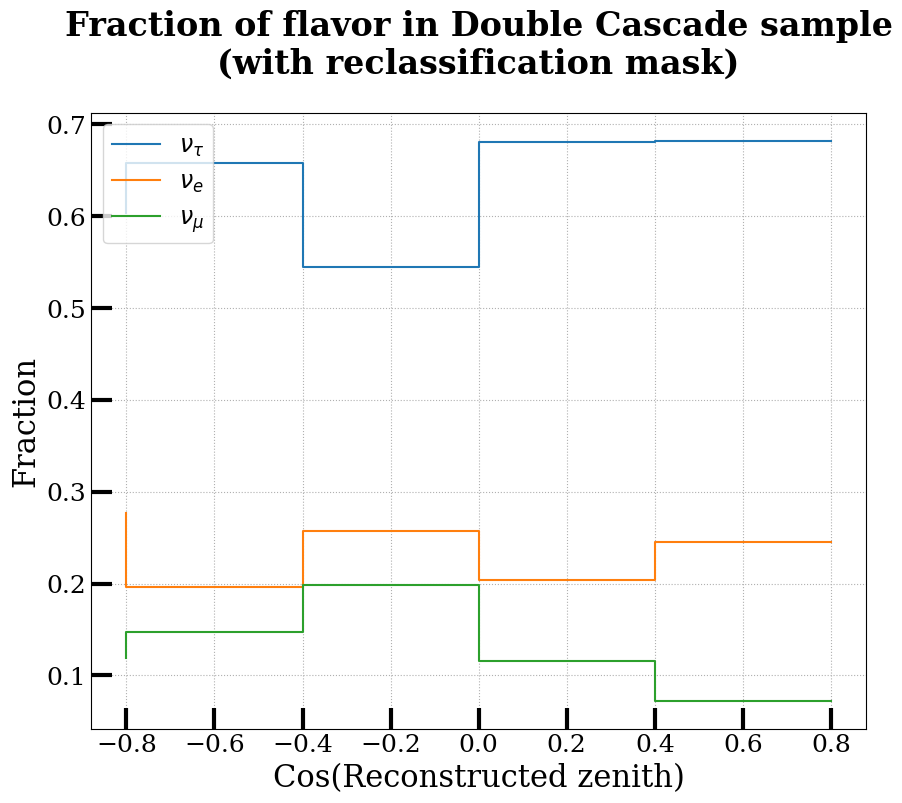

In [24]:
fig= plt.figure(figsize=(10,8))
ax = plt.subplot(111)



zenith_center = (zenith_bins[:-1] + zenith_bins[1:]) / 2
plt.step(zenith_center,nutau_frac_zenith/zenith,label=r'${\nu}_{\tau}$')
plt.step(zenith_center,nue_frac_zenith/zenith,label=r'${\nu}_{e}$')
plt.step(zenith_center,numu_frac_zenith/zenith,label=r'${\nu}_{\mu}$')



plt.title('Fraction of flavor in Double Cascade sample\n(with reclassification mask)',fontdict=font_title,y=1.05)

plt.xlabel("Cos(Reconstructed zenith)",fontdict=font_axis_label)
plt.ylabel("Fraction", fontdict=font_axis_label)
for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(18)
    item.set_family('serif')
ax.tick_params(axis='both',which='major',width=3,length=15,direction='in')
ax.tick_params(axis='both',which='minor',width=1,length=8,direction='in')
plt.grid(True, which="both", ls=":")
ax.legend(prop=font_legend,loc='upper left')
#plt.semilogx()
plt.show()

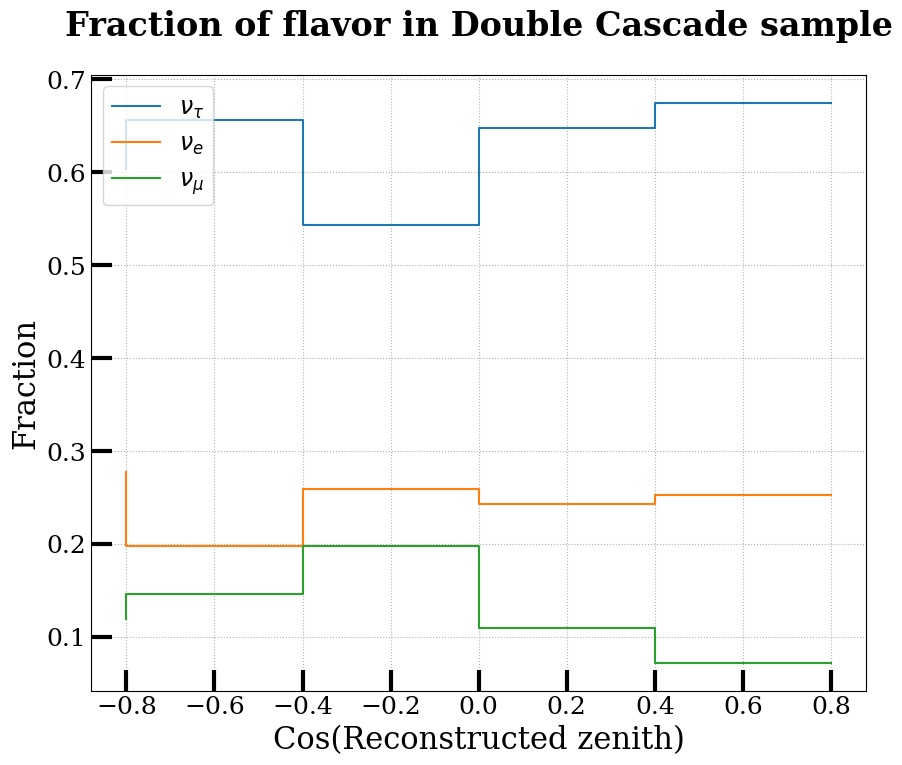

In [26]:
fig= plt.figure(figsize=(10,8))
ax = plt.subplot(111)



zenith_center = (zenith_bins[:-1] + zenith_bins[1:]) / 2
plt.step(zenith_center,nutau_frac_zenith_old/zenith_old,label=r'${\nu}_{\tau}$')
plt.step(zenith_center,nue_frac_zenith_old/zenith_old,label=r'${\nu}_{e}$')
plt.step(zenith_center,numu_frac_zenith_old/zenith_old,label=r'${\nu}_{\mu}$')



plt.title('Fraction of flavor in Double Cascade sample',fontdict=font_title,y=1.05)

plt.xlabel("Cos(Reconstructed zenith)",fontdict=font_axis_label)
plt.ylabel("Fraction", fontdict=font_axis_label)
for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(18)
    item.set_family('serif')
ax.tick_params(axis='both',which='major',width=3,length=15,direction='in')
ax.tick_params(axis='both',which='minor',width=1,length=8,direction='in')
plt.grid(True, which="both", ls=":")
ax.legend(prop=font_legend,loc='upper left')
#plt.semilogx()
plt.show()

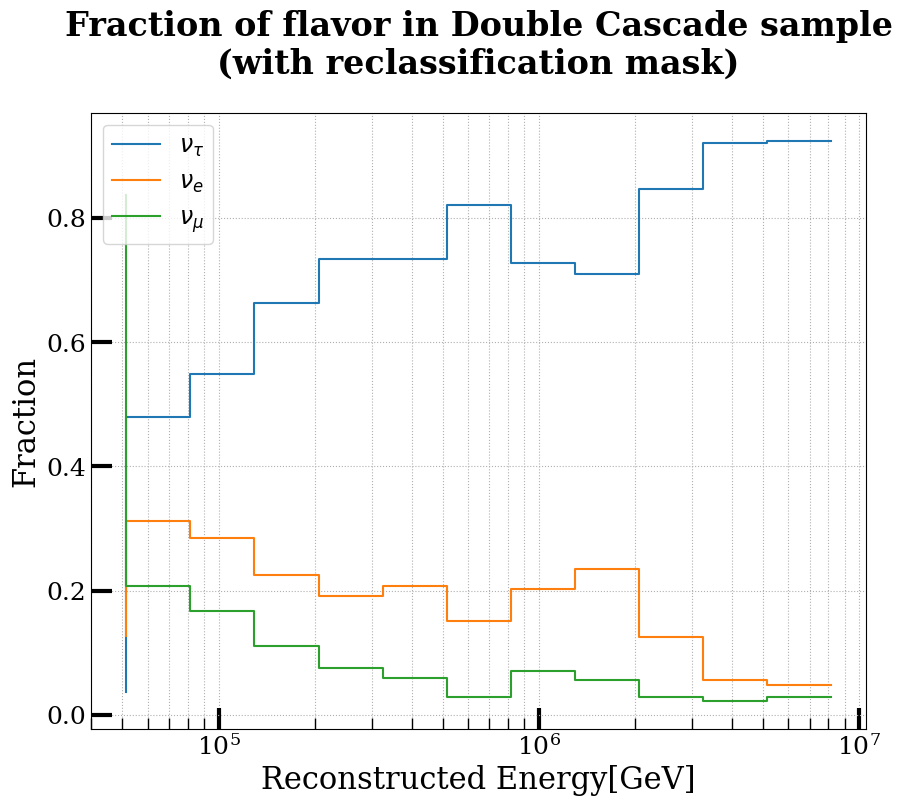

In [25]:
fig= plt.figure(figsize=(10,8))
ax = plt.subplot(111)



energy_center = (energy_bins[:-1] + energy_bins[1:]) / 2
plt.step(energy_center,nutau_frac_energy/energy,label=r'${\nu}_{\tau}$')
plt.step(energy_center,nue_frac_energy/energy,label=r'${\nu}_{e}$')
plt.step(energy_center,numu_frac_energy/energy,label=r'${\nu}_{\mu}$')



plt.title('Fraction of flavor in Double Cascade sample\n(with reclassification mask)',fontdict=font_title,y=1.05)

plt.xlabel("Reconstructed Energy[GeV]",fontdict=font_axis_label)
plt.ylabel("Fraction", fontdict=font_axis_label)
for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(18)
    item.set_family('serif')
ax.tick_params(axis='both',which='major',width=3,length=15,direction='in')
ax.tick_params(axis='both',which='minor',width=1,length=8,direction='in')
plt.grid(True, which="both", ls=":")
ax.legend(prop=font_legend,loc='upper left')
plt.semilogx()
plt.show()

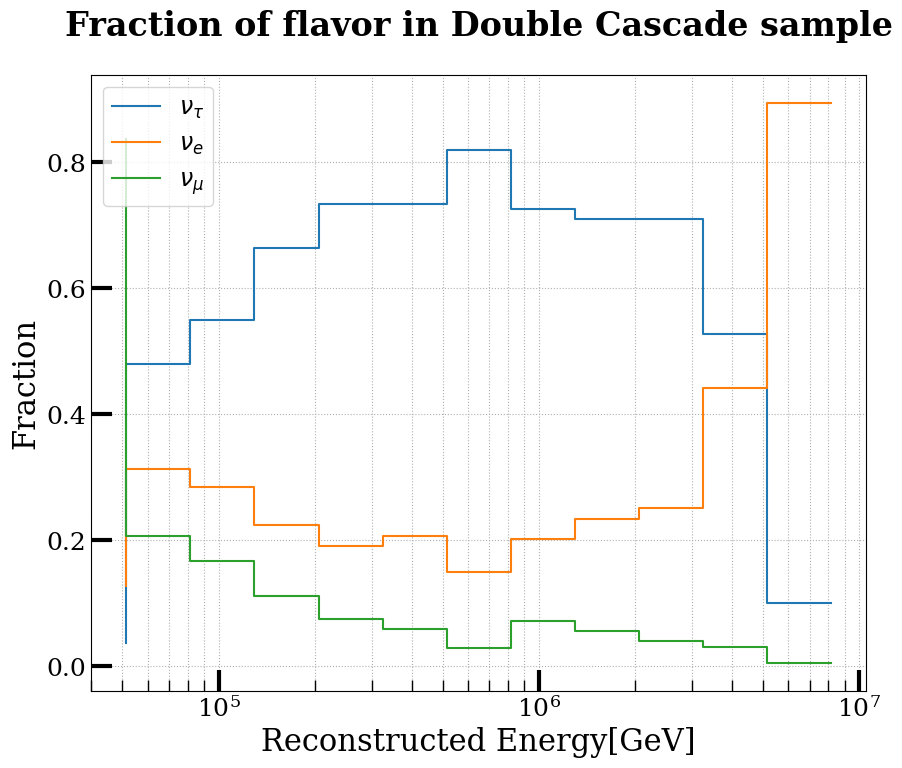

In [26]:
fig= plt.figure(figsize=(10,8))
ax = plt.subplot(111)



energy_center = (energy_bins[:-1] + energy_bins[1:]) / 2
plt.step(energy_center,nutau_frac_energy_old/energy_old,label=r'${\nu}_{\tau}$')
plt.step(energy_center,nue_frac_energy_old/energy_old,label=r'${\nu}_{e}$')
plt.step(energy_center,numu_frac_energy_old/energy_old,label=r'${\nu}_{\mu}$')



plt.title('Fraction of flavor in Double Cascade sample',fontdict=font_title,y=1.05)

plt.xlabel("Reconstructed Energy[GeV]",fontdict=font_axis_label)
plt.ylabel("Fraction", fontdict=font_axis_label)
for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(18)
    item.set_family('serif')
ax.tick_params(axis='both',which='major',width=3,length=15,direction='in')
ax.tick_params(axis='both',which='minor',width=1,length=8,direction='in')
plt.grid(True, which="both", ls=":")
ax.legend(prop=font_legend,loc='upper left')
plt.semilogx()
plt.show()